In [26]:
from matplotlib import pyplot as plt
import numpy as np

from modules import calib

In [27]:
# ave_dx = calib.f2s(calib.px2mm(np.loadtxt("ave/ave_40_dx.csv", delimiter=',')))
# ave_dy = calib.f2s(calib.px2mm(np.loadtxt("ave/ave_40_dy.csv", delimiter=',')))
ave_dx = calib.f2s(calib.px2mm(np.loadtxt("dx_100_101.csv", delimiter=',')))
ave_dy = calib.f2s(calib.px2mm(np.loadtxt("dy_100_101.csv", delimiter=',')))

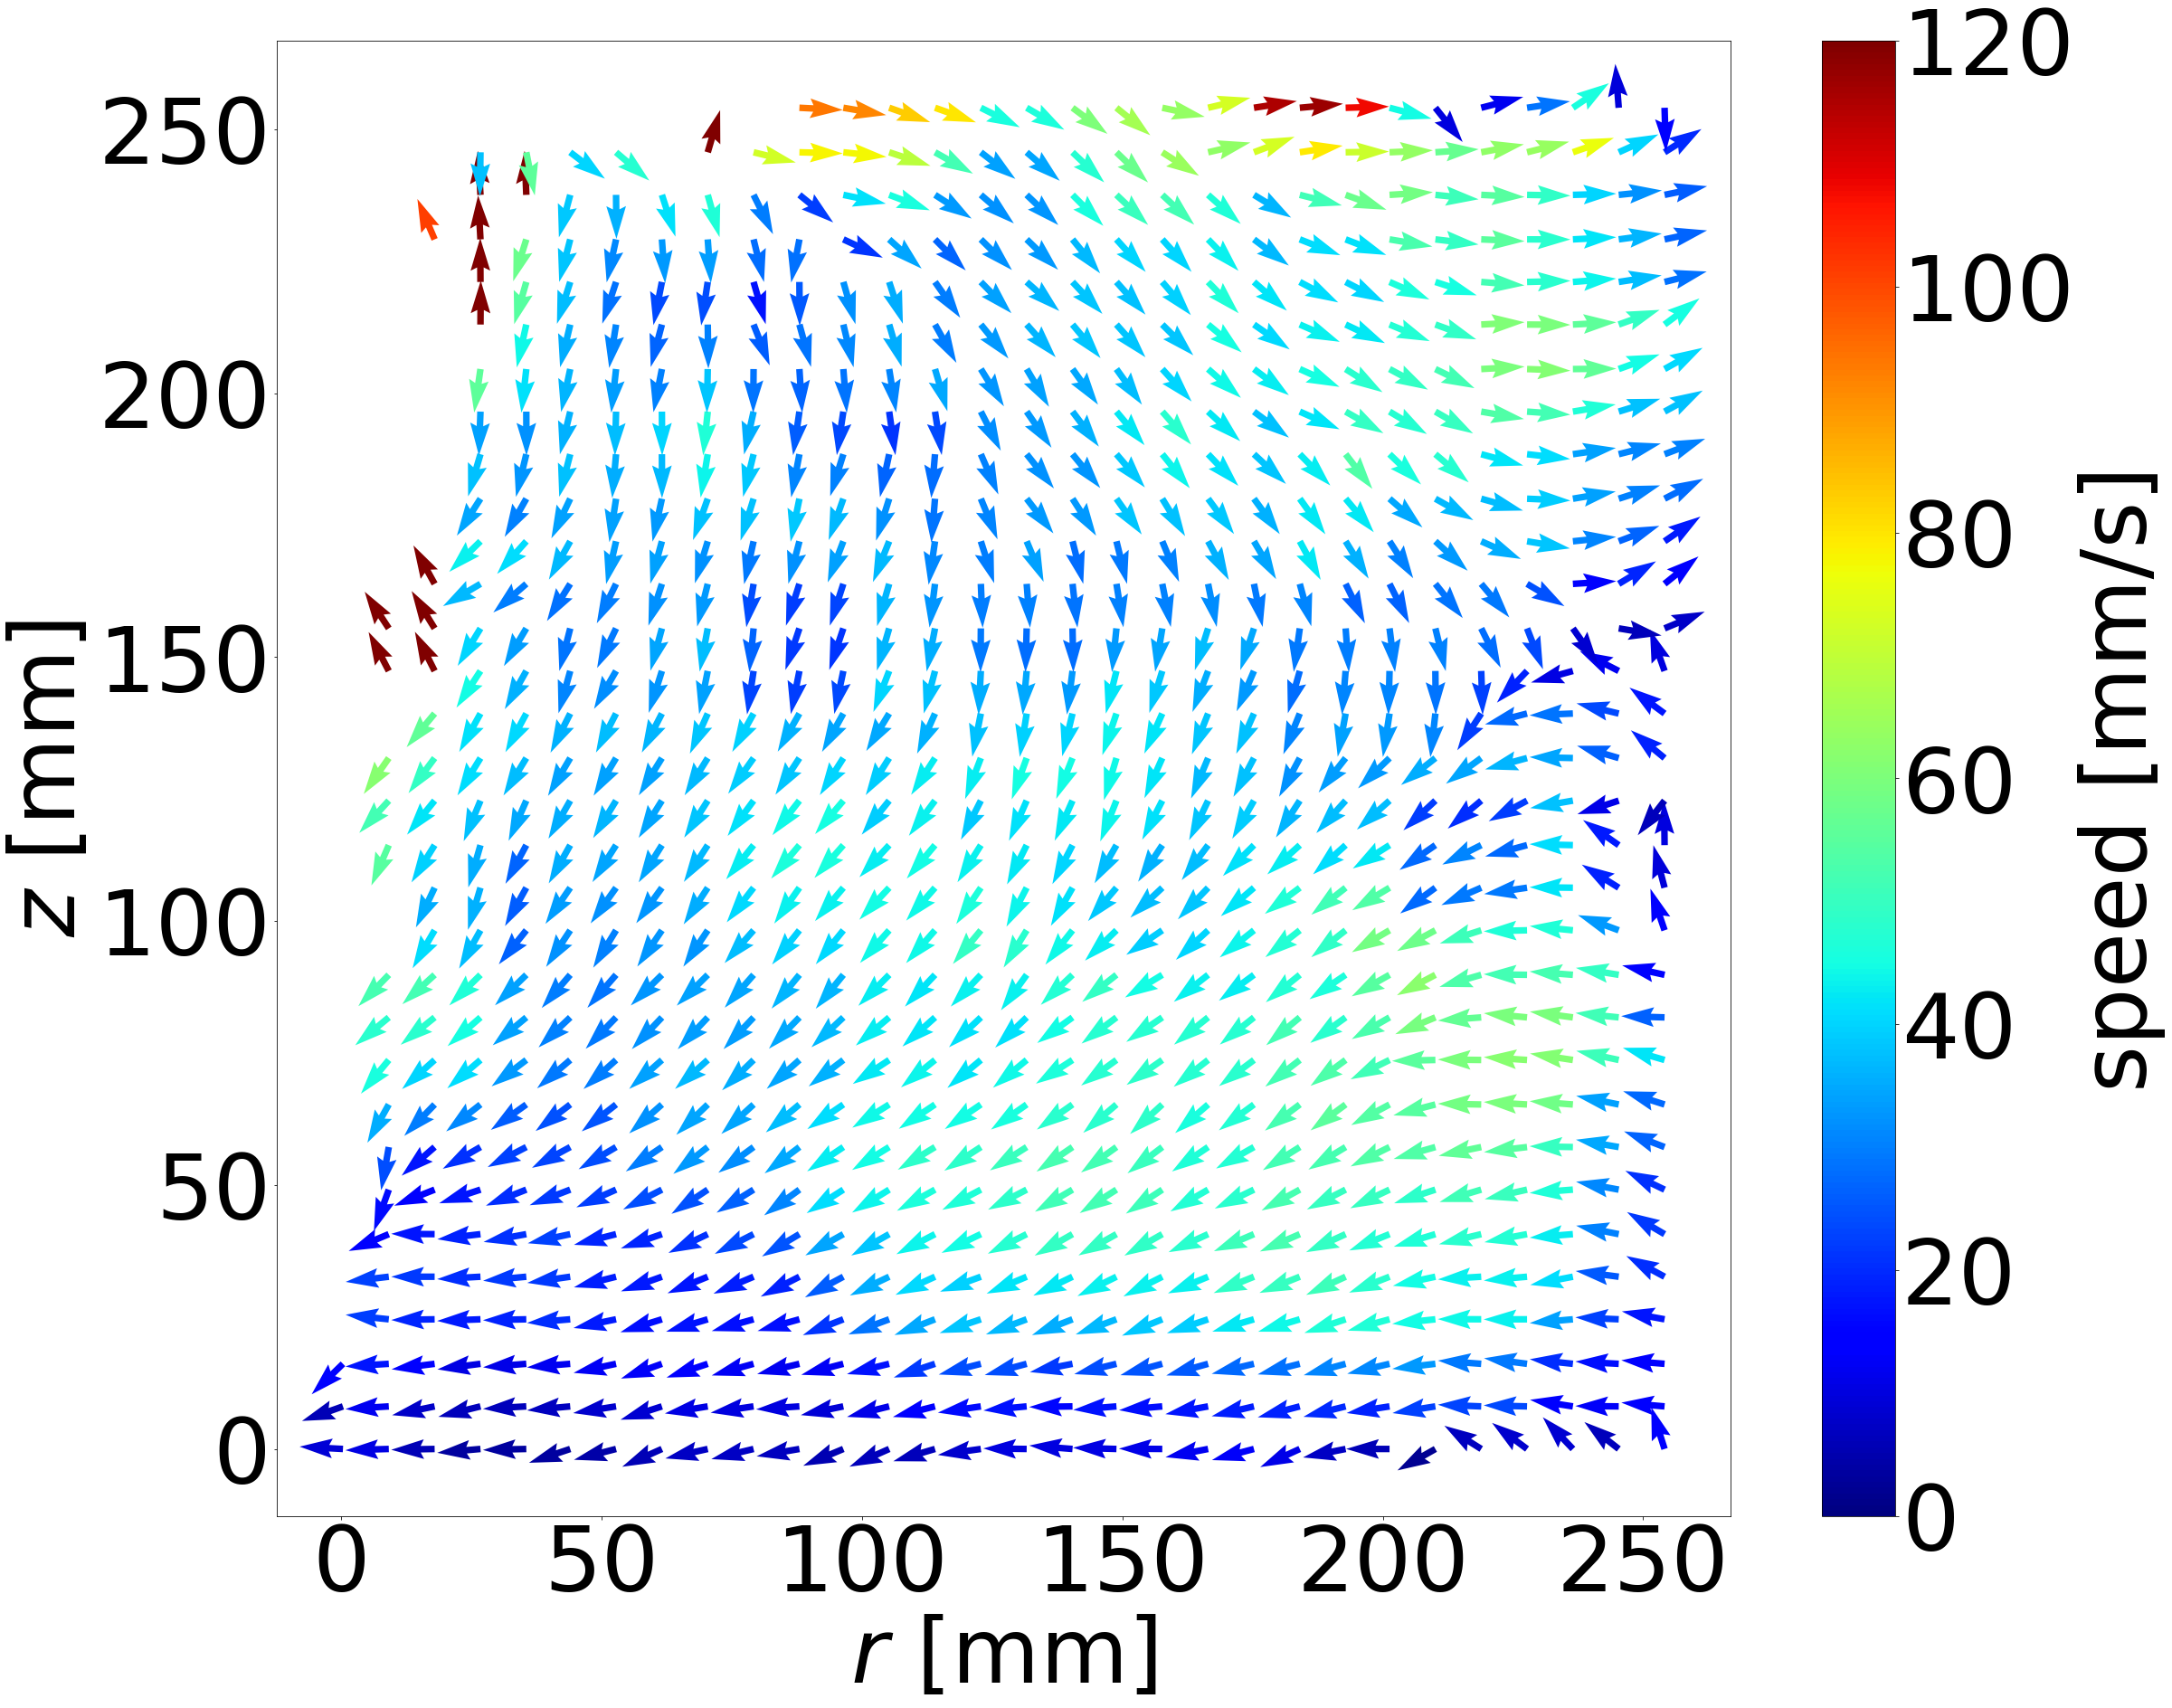

In [28]:
width, height = 739, 693
n = 32

x, y = np.meshgrid(np.linspace(693, -46, n, dtype="int"), np.linspace(0, height, n, dtype="int"))
x = calib.px2mm(x)
y = calib.px2mm(y)

fig, ax = plt.subplots(figsize=(36, 30))
plt.xlabel("$r$ [mm]", fontsize=100)
plt.ylabel("$z$ [mm]", fontsize=100)
plt.xticks(fontsize=100)
plt.yticks(fontsize=100)
c = np.sqrt(ave_dx**2 + ave_dy**2)

ave_dx /= c
ave_dy /= c

x = x[:, :-2]
y = y[:, :-2]
ave_dx = ave_dx[:, :-2]
ave_dy = ave_dy[:, :-2]
c = c[:, :-2]

im = ax.quiver(x, y, -ave_dx, ave_dy, c, cmap="jet", scale_units='xy', scale=0.12, width=0.0045)

pp = fig.colorbar(im)
for t in pp.ax.get_yticklabels():
    t.set_fontsize(100)
pp.set_label('speed [mm/s]', fontsize=100)
im.set_clim(0, 120)
plt.savefig("40_dx_dy.png", dpi=300)